In [3]:
import re # 정규식을 표현 및 사용하기 위한 라이브러리 호출
from konlpy.tag import Twitter  # konlpy 사용을 위한 라이브러리 호출
from collections import Counter # dict 확장 데이터를 사용하기 위한 라이브러리 호출
import matplotlib.pyplot as plt # 그래프 사용을 위한 라이브러리 호출
import matplotlib # matplotlib 라이브러리 호출 
from matplotlib import font_manager,rc # 폰트매니저 사용을 위해 호출
from lxml import html # lxml을 이용하기 위해 html을 임폴트한다. 
from bs4 import BeautifulSoup  # HTML 파싱을 위한 라이브러리 호출
import time # 시간 값을 사용하기 위한 라이브러리 호출
import pandas as pd # 판다스 사용을 위한 라이브러리 호출
import sys # 파이썬 인터프리가 제공하는 변수들과 함수들을 직접 제어할수 있게 해주는 모델이다. 
import urllib.request # url 사용을 위한 라이브러리 호출
from urllib.parse import quote # URL을 파씽하기 위해서 사용한다. 

In [2]:
TARGET_URL_BEFORE_PAGE_NUM = "http://news.donga.com/search?p="
TARGET_URL_BEFORE_KEYWORD = '&query='
TARGET_URL_REST = '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1'

In [3]:
def get_link_from_news_title(page_num, URL,output_file):
# get_link_from_news_title이라는 함수를 정의한다.(페이지수, url, 출력파일) 
    for i in range(page_num):
    # for문을 돌려서 순차적으로 확인한다.
        current_page_num = 1 + i*15
        # current_page_num은 페이지당 15개의 게시물을 검색한다.        
        position = URL.index('=')
        # position은 URL 처음 ‘=’ 오는 위치 반환한다. (URL에 몇페이지 인지 추가하기 위해)        
        URL_with_page_num = URL[: position+1] + str(current_page_num) \
                            + URL[position+1 :]
        # URL_with_page_num은 페이지에 있는 URL을 재구성한다.     
        source_code_from_URL=urllib.request.urlopen(URL_with_page_num)
        # 재구성한 URL을 request로 호출한다.        
        soup=BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='UTF-8')
        # soup는 BeautifulSoup로 변환한다. 
        # BeautifulSoup를 이용하여 기사를 추출하여 분석한다.
        
        for title in soup.find_all('p'):
            title_link = title.select('a')
            article_URL = title_link[0]['href']
            get_text(article_URL, output_file)
        # 본문 기사가 담긴 URL을 찾기위해서 for문을 돌려서 soup에 경로에서 p -> a.href로 된 내용들을 
          text에 저장한다.

In [34]:
def get_text(URL, output_file):
    source_code_from_url = urllib.request.urlopen(URL)
    soup = BeautifulSoup(source_code_from_url, 'lxml', from_encoding='UTF-8')
    # BeautifulSoup로 페이지를 분석하기위해 soup변수로 할당 받습니다.
    content_of_article = soup.select('div.article_txt')
        for item in content_of_article:
        string_item = str(item.find_all(text=True))
        output_file.write(string_item)
    # 기사 페이지를 요청받아서 기사의 본문 내용을 추출한다.

In [35]:
def main():
    keyword = "김정은" 
    #키워드는 검색하고 하는 단어를 검색한다. 김정은을 제외하고 나머지는 위와 동일한 코드를 이용하였다.
    #남북정상회담
    #북한
    #통일
    page_num = 50         #기사를 가져올 페이지 수를 나타낸다,
    output_file_name = "김정은.txt" #해당 기사를 출력할 파일명을 나타낸다.
    #남북정상회담.txt
    #북한.txt
    #통일.txt
    target_URL = TARGET_URL_BEFORE_PAGE_NUM + TARGET_URL_BEFORE_KEYWORD \
                 + quote(keyword) + TARGET_URL_REST
    output_file = open(output_file_name, 'w', -1,"utf-8")
    get_link_from_news_title(page_num, target_URL, output_file)
    output_file.close()
    #해당 키워드에 대한 내용을 토대로 URL에서 해당 검색할 기사들을 토대로 txt파일로 추출해준다. 
    #txt파일의 경우에는 utf-8과 쓰기권한을 부여한다.


In [36]:
if __name__ == '__main__':
    main()

In [3]:
import re
INPUT_FILE_NAME = '김정은.txt'
 #남북정상회담
    #북한
    #통일
OUTPUT_FILE_NAME = '김정은(문장).txt'
 #남북정상회담
    #북한
    #통일

In [4]:
def clean_text(text):
    cleaned_text = re.sub('[a-zA-Z]' , '', text)
    cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]',
                          '', cleaned_text)
    return cleaned_text
# clean_text라는 함수를 정의한다.
# clean_text라는 함수에는 글자를 제외하고 영문/특수문자/공백 등등을 제거한다. 

In [5]:
def main():
    read_file = open(INPUT_FILE_NAME, 'r', encoding = 'utf-8')
    write_file = open(OUTPUT_FILE_NAME, 'w', encoding = 'utf-8')
    text = read_file.read()
    text = clean_text(text)
    write_file.write(text)
    read_file.close()
    write_file.close() 
# 입력 파일과 출력 파일은 utf-8, 입력 파일의 경우 읽기권한, 출력 파일의 경우 쓰기권한을 부여해준다. 
# 이전에 입력한 파일의 경우에는 문자/공백/특수기호와 같이 정리 안된 문서를 문장들만 남도록 정리해준다. 

In [54]:
if __name__ == "__main__":
    main()

In [6]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # spliter는 konlpy의 Twitter객체이다.
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출한다.
    count = Counter(nouns)
    # coun는 Counter객체를 생성하고 참조변수 nouns할당해준다.
    return_list = []  # return_list는 명사 빈도수 저장할 변수, 그리고 배열을 가지고 있다. 
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수가 큰 명사부터 순서대로 입력받은 정수 
      개수만큼 저장되어있는 객체 반환
    # 명사와 사용된 개수를 return_list에 저장합니다.
    return return_list 
# 즉 명사 추출하기 위한 코드이다. 

In [7]:
def main():
    text_file_name = "북한(문장).txt"
    #남북정상회담
    #북한
    #통일
    # 분석할 파일을 입력한다. 이 경우도 나머지의 파일들도 해당 코드로 동일하게 수행한다. 
    noun_count = 1000
    # 최대 많은 빈도수 부터 1000개 명사를 추출한다.
    output_file_name = "북한(분석됨).txt"
    # 명사 추출후 출력되는 txt파일 이름을 정의한다. 
    # count.txt 에 저장
    open_text_file = open(text_file_name, 'r',-1, encoding = "utf-8")
    text = open_text_file.read() 
    tags = get_tags(text, noun_count)
    open_text_file.close()   
    open_output_file = open(output_file_name, 'w',-1, encoding = "utf-8")
    # 분석할 파일을 열어서 해당 파일의 내용들을 명사로 추출한다. 
     
    for tag in tags:
        noun = tag['tag']
        count = tag['count']
        open_output_file.write('{} {}\n'.format(noun, count))
    # 추출된 명사들의 빈도를 나타내고 가장 빈도수가 높은 순서대로 나열한 후 결과를 저장한다.
    open_output_file.close() 
# 명사 추출 후 txt파일로 만드는 코드이다. 

In [80]:
if __name__=="__main__":
    main()

In [5]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Buk = pd.read_csv('북한(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
Unity = pd.read_csv('통일(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
KimJun = pd.read_csv('김정은(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
Nam = pd.read_csv('남북정상회담(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')

In [14]:
Buk

키워드   빈도수
0       것  5154
1      북한  4841
2       일  2652
3      미국  1982
4     대통령  1978
5       고  1904
6       년  1843
7    정상회담  1813
8     트럼프  1712
9      회담  1689
10     북미  1628
11     보수  1568
12      살  1538
13     추천  1508
14      수  1501
15     해고  1501
16     정부  1430
17    비핵화  1387
18      등  1247
19      이  1245
20      명  1196
21     뉴스  1174
22    김정은  1108
23      중  1091
24     기사  1000
25      달   988
26      그   986
27     중국   961
28     남북   950
29     모두   949
..    ...   ...
970    마치    38
971    면담    38
972   로부터    38
973   얼마나    38
974    대회    38
975    기온    38
976   김동철    38
977   리커창    38
978   전망대    37
979     환    37
980  페이스북    37
981    누구    37
982  우리나라    37
983    제안    37
984    촬영    37
985    자원    37
986    민주    37
987   마지막    37
988    이동    37
989    연례    37
990    간의    37
991    순위    37
992    운명    37
993    결코    37
994    차이    37
995    도전    37
996    금지    37
997    체포    37
998    북일    37
999   김학송    37

[1000 rows x 2 columns]

In [7]:
Buk = Buk.set_index('키워드')
Unity = Unity.set_index('키워드')
KimJun = KimJun.set_index('키워드')
Nam = Nam.set_index('키워드')

In [8]:
Buk=Buk.rename(columns={'빈도수':'북한'})
Unity=Unity.rename(columns={'빈도수':'통일'})
KimJun=KimJun.rename(columns={'빈도수':'김정은'})
Nam=Nam.rename(columns={'빈도수':'남북정상회담'})

In [9]:
Buk = Buk.head(50)
Unity=Unity.head(50)
KimJun=KimJun.head(50)
Nam=Nam.head(50)

In [10]:
Buk = Buk.drop('것')
Unity=Unity.drop('것')
KimJun=KimJun.drop('것')
Nam=Nam.drop('것')

In [11]:
Buk

북한
키워드         
북한      4841
일       2652
미국      1982
대통령     1978
고       1904
년       1843
정상회담    1813
트럼프     1712
회담      1689
북미      1628
보수      1568
살       1538
추천      1508
수       1501
해고      1501
정부      1430
비핵화     1387
등       1247
이       1245
명       1196
뉴스      1174
김정은     1108
중       1091
기사      1000
달        988
그        986
중국       961
남북       950
모두       949
우리       946
최고       940
남북정상회담   912
한국       910
며        907
핵        889
당국       886
영호       884
역사       873
전        853
한반도      834
오늘       824
타고       806
귀순       799
남성       774
외교관      771
창        768
여행       766
나경원      765
내일       763

In [21]:
Unity

통일
키워드         
북한      3402
남북      2588
대통령     2550
일       2469
년       2400
고       2067
정상회담    1842
등       1837
회담      1739
보수      1622
살       1555
김정은     1529
추천      1518
비핵화     1512
수       1500
해고      1500
정부      1495
이       1483
남북정상회담  1454
우리      1246
평화      1236
뉴스      1213
선언      1196
한반도     1192
김       1166
명       1161
판문점     1126
역사      1116
중       1097
위원장     1074
북미      1072
기사      1069
통일      1010
모두      1005
오늘      1001
최고       981
미국       968
며        952
트럼프      941
달        920
그        907
월        893
당국       873
북        857
한국       854
서울       833
전        830
문        822
타고       805

In [22]:
KimJun

김정은
키워드         
북한      4934
대통령     3009
일       2870
정상회담    2472
트럼프     2431
김정은     2184
고       2060
북미      2045
미국      2015
년       1873
회담      1842
비핵화     1720
수       1586
보수      1575
살       1548
추천      1513
중국      1506
해고      1502
이       1328
정부      1296
등       1218
남북정상회담  1181
뉴스      1165
그       1139
중       1115
남북      1100
명       1090
위원장     1086
한반도     1081
기사      1067
핵       1045
김       1009
달        991
모두       968
우리       950
월        938
최고       935
한국       929
역사       919
전        917
며        914
당국       865
판문점      860
영호       856
오늘       837
타고       816
내일       776
외교관      776
문제       767

In [23]:
Nam

남북정상회담
키워드           
대통령       3567
일         2576
북한        2405
남북정상회담    2386
고         2058
년         1875
정상회담      1728
남북        1695
보수        1619
살         1543
추천        1519
해고        1500
뉴스        1444
등         1412
비핵화       1370
평화        1362
회담        1331
김정은       1315
판문점       1281
정부        1278
한반도       1276
선언        1263
이         1256
김         1220
수         1208
위원장       1189
문         1178
한국        1175
역사        1139
중         1077
명         1035
북미        1035
오늘        1035
우리        1017
며         1008
문재인        998
트럼프        968
모두         966
날          948
달          919
기사         912
최고         891
정상         857
월          847
당국         823
대표         787
나경원        787
창          782
타고         778

In [34]:
Buk.to_csv('북한_중간.csv',encoding="cp949", mode="w",index=True)
Unity.to_csv('통일_중간.csv',encoding="cp949", mode="w",index=True)
KimJun.to_csv('김정은_중간.csv',encoding="cp949", mode="w",index=True)
Nam.to_csv('남북정상회담_중간.csv',encoding="cp949", mode="w",index=True)

In [12]:
sum1 = pd.merge(Buk, Unity, how="inner",left_index=True,right_index=True)
sum2 = pd.merge(sum1, KimJun, how="inner",left_index=True,right_index=True)
sum3 = pd.merge(sum2, Nam, how="inner",left_index=True,right_index=True)
sum3 = sum3.fillna(0)
sum3[:]

북한    통일   김정은  남북정상회담
키워드                             
북한      4841  3402  4934    2405
일       2652  2469  2870    2576
대통령     1978  2550  3009    3567
고       1904  2067  2060    2058
년       1843  2400  1873    1875
정상회담    1813  1842  2472    1728
트럼프     1712   941  2431     968
회담      1689  1739  1842    1331
북미      1628  1072  2045    1035
보수      1568  1622  1575    1619
살       1538  1555  1548    1543
추천      1508  1518  1513    1519
수       1501  1500  1586    1208
해고      1501  1500  1502    1500
정부      1430  1495  1296    1278
비핵화     1387  1512  1720    1370
등       1247  1837  1218    1412
이       1245  1483  1328    1256
명       1196  1161  1090    1035
뉴스      1174  1213  1165    1444
김정은     1108  1529  2184    1315
중       1091  1097  1115    1077
기사      1000  1069  1067     912
달        988   920   991     919
남북       950  2588  1100    1695
모두       949  1005   968     966
우리       946  1246   950    1017
최고       940   981   935     891
남북정상회담   912  1454  1181    2386
한국       910   854   929    1175
며        907   952   914    1008
당국       886   873   865     823
역사       873  1116   919    1139
한반도      834  1192  1081    1276
오늘       824  1001   837    1035
타고       806   805   816     778

In [37]:
sum3.to_csv('동아일보_중간.csv',encoding="cp949", mode="w",index=True)

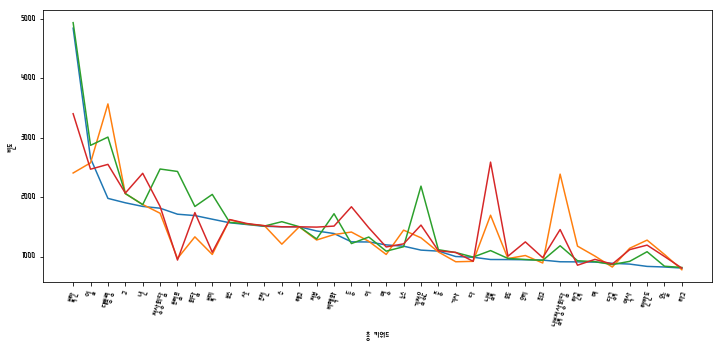

In [33]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (12,5)
sorted(sum3.index,reverse=True)     
plt.plot(sorted(sum3.index,reverse=False), sum3['북한'])
plt.plot(sorted(sum3.index,reverse=False), sum3['남북정상회담'])
plt.plot(sorted(sum3.index,reverse=False), sum3['김정은'])
plt.plot(sorted(sum3.index,reverse=False), sum3['통일'])
plt.xticks(sorted(sum3.index,reverse=False), sum3.index, rotation='75')
plt.xlabel('총 키워드') 
plt.ylabel('빈도') 
plt.show()
# 병합한것을 그래프로 만들어서 어떤 키워드에 많이 영향을 가지고있는지 확인 

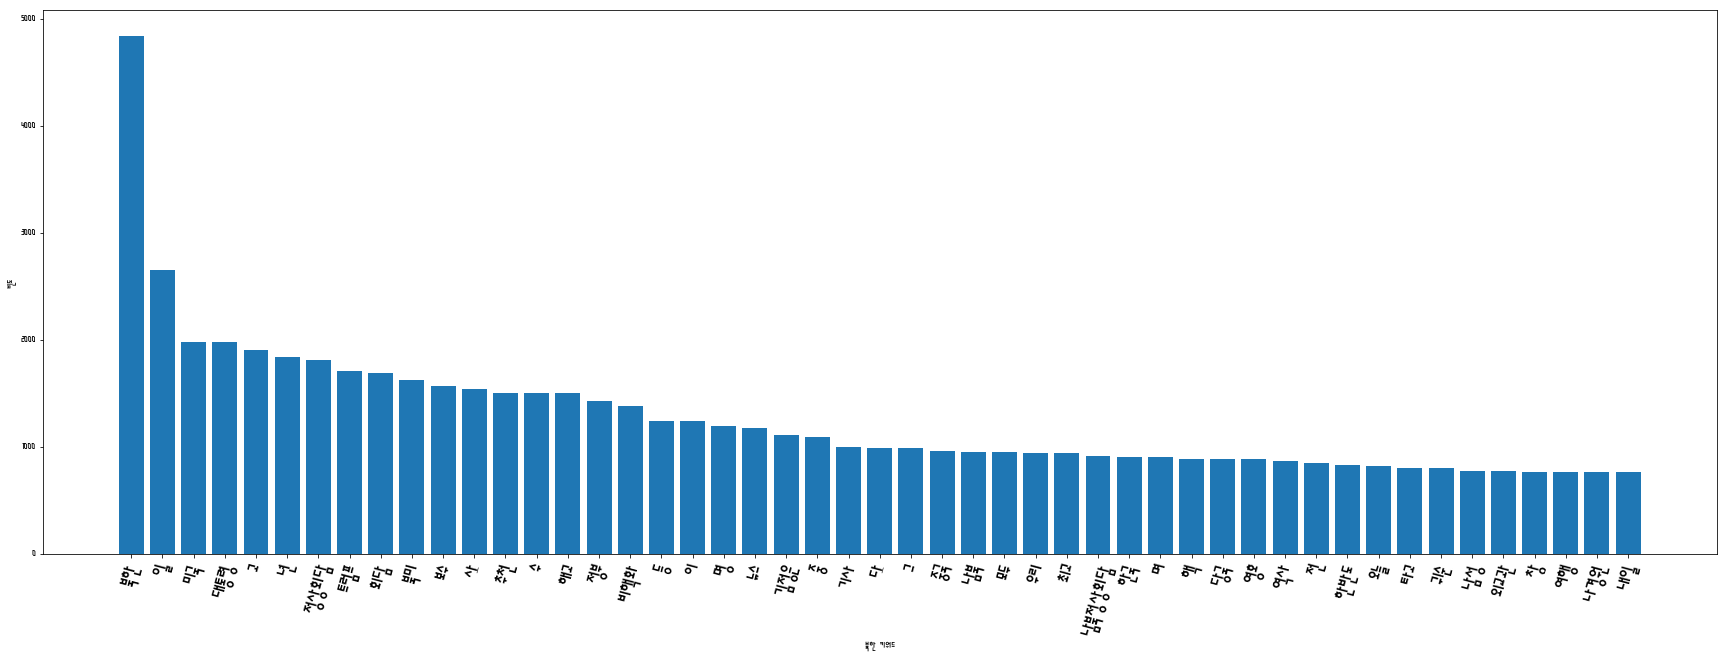

In [16]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Buk.index,reverse=True)     
plt.bar(sorted(Buk.index,reverse=False), Buk["북한"])
plt.xticks(sorted(Buk.index,reverse=False), Buk.index, rotation='75')
plt.xlabel('북한 키워드') 
plt.ylabel('빈도') 
plt.show()
# 북한 키워드 빈도 그래프

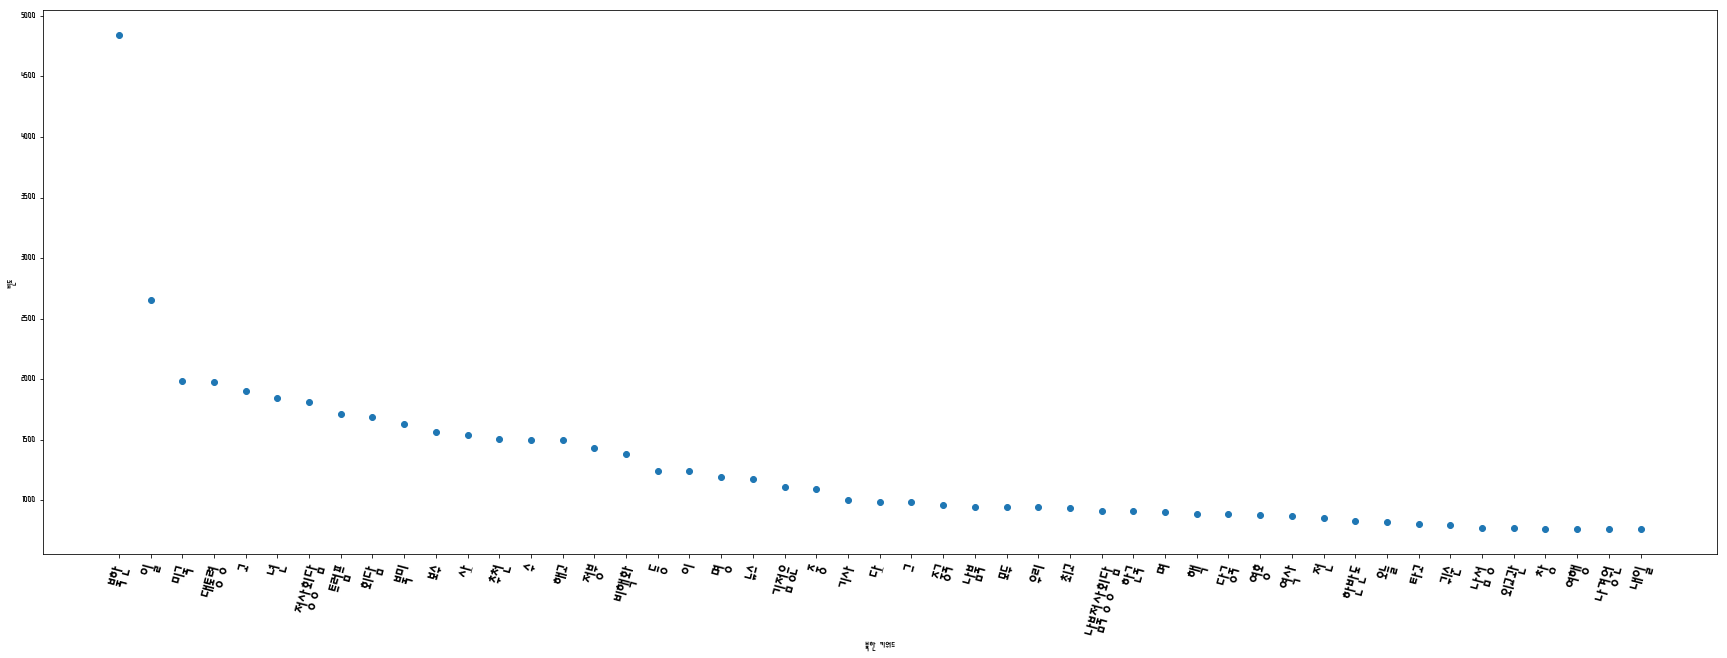

In [21]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Buk.index,reverse=True)     
plt.scatter(sorted(Buk.index,reverse=False), Buk["북한"])
plt.xticks(sorted(Buk.index,reverse=False), Buk.index, rotation='75')
plt.xlabel('북한 키워드') 
plt.ylabel('빈도') 
plt.show()

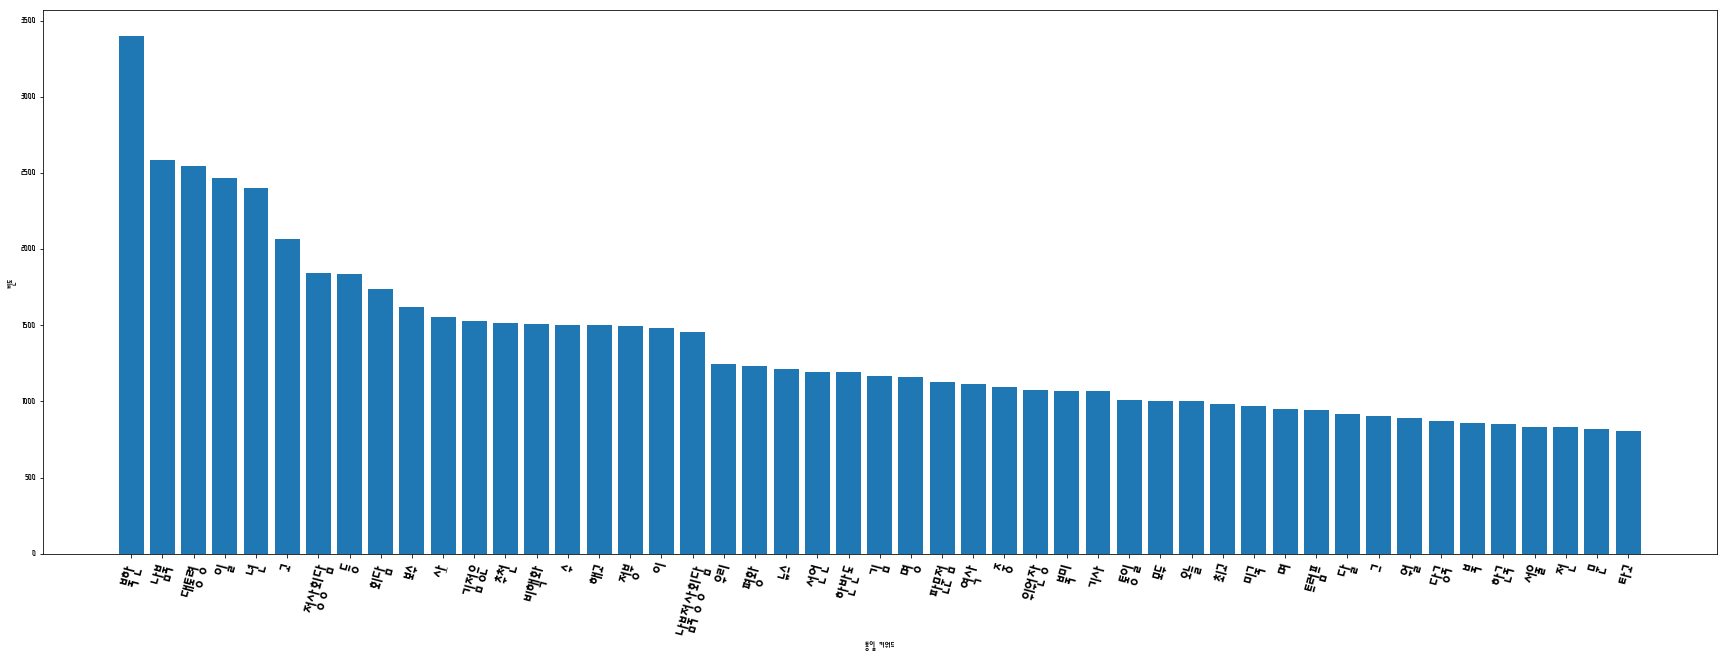

In [64]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Unity.index,reverse=True)     
plt.bar(sorted(Unity.index,reverse=False), Unity["통일"])
plt.xticks(sorted(Unity.index,reverse=False), Unity.index, rotation='75')
plt.xlabel('통일 키워드') 
plt.ylabel('빈도') 
plt.show()
# 통일 키워드 빈도 그래프

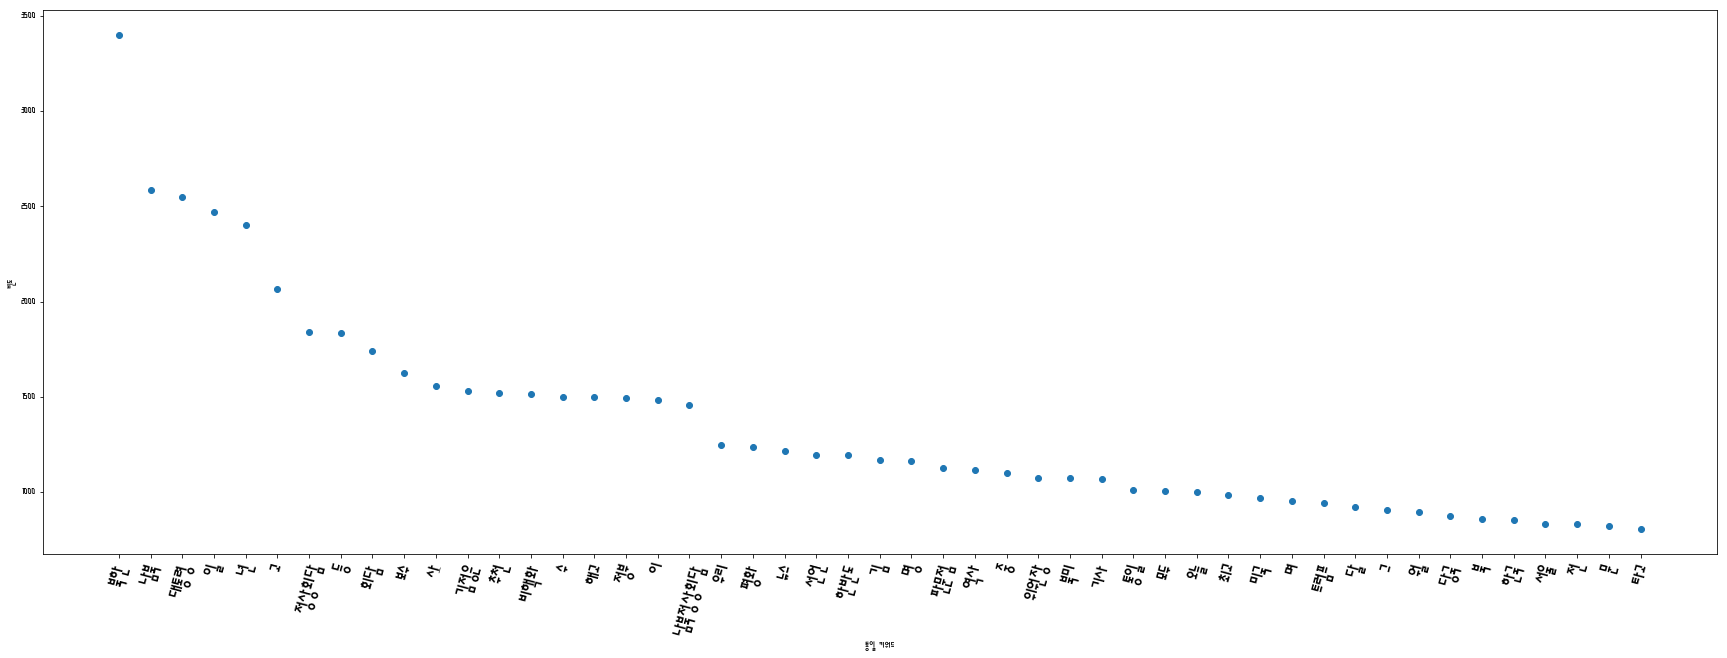

In [65]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Unity.index,reverse=True)     
plt.scatter(sorted(Unity.index,reverse=False), Unity["통일"])
plt.xticks(sorted(Unity.index,reverse=False), Unity.index, rotation='75')
plt.xlabel('통일 키워드') 
plt.ylabel('빈도') 
plt.show()
# 통일 키워드 빈도 그래프

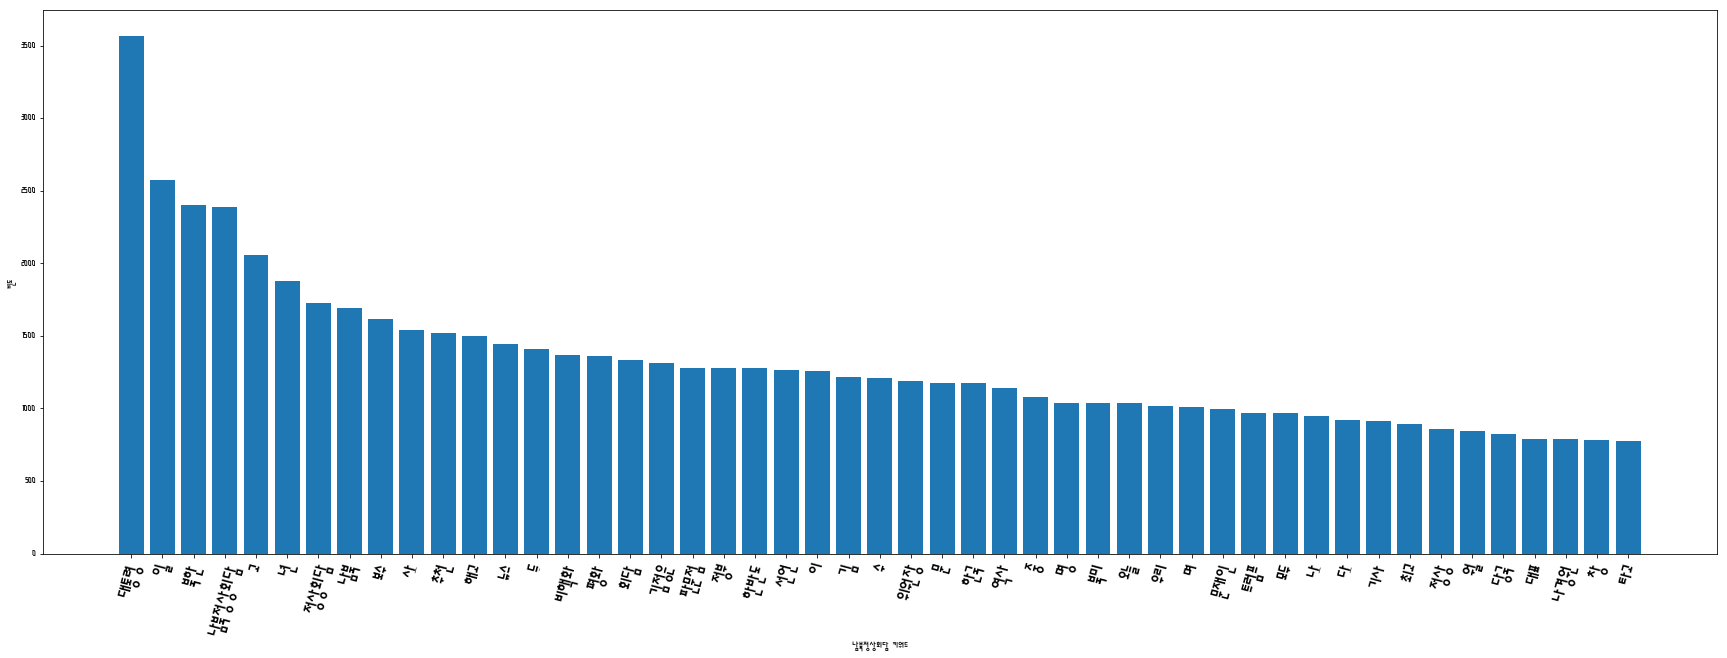

In [67]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Nam.index,reverse=True)     
plt.bar(sorted(Nam.index,reverse=False), Nam["남북정상회담"])
plt.xticks(sorted(Nam.index,reverse=False), Nam.index, rotation='75')
plt.xlabel('남북정상회담 키워드') 
plt.ylabel('빈도') 
plt.show()
# 남북정상회담 키워드 빈도 그래프

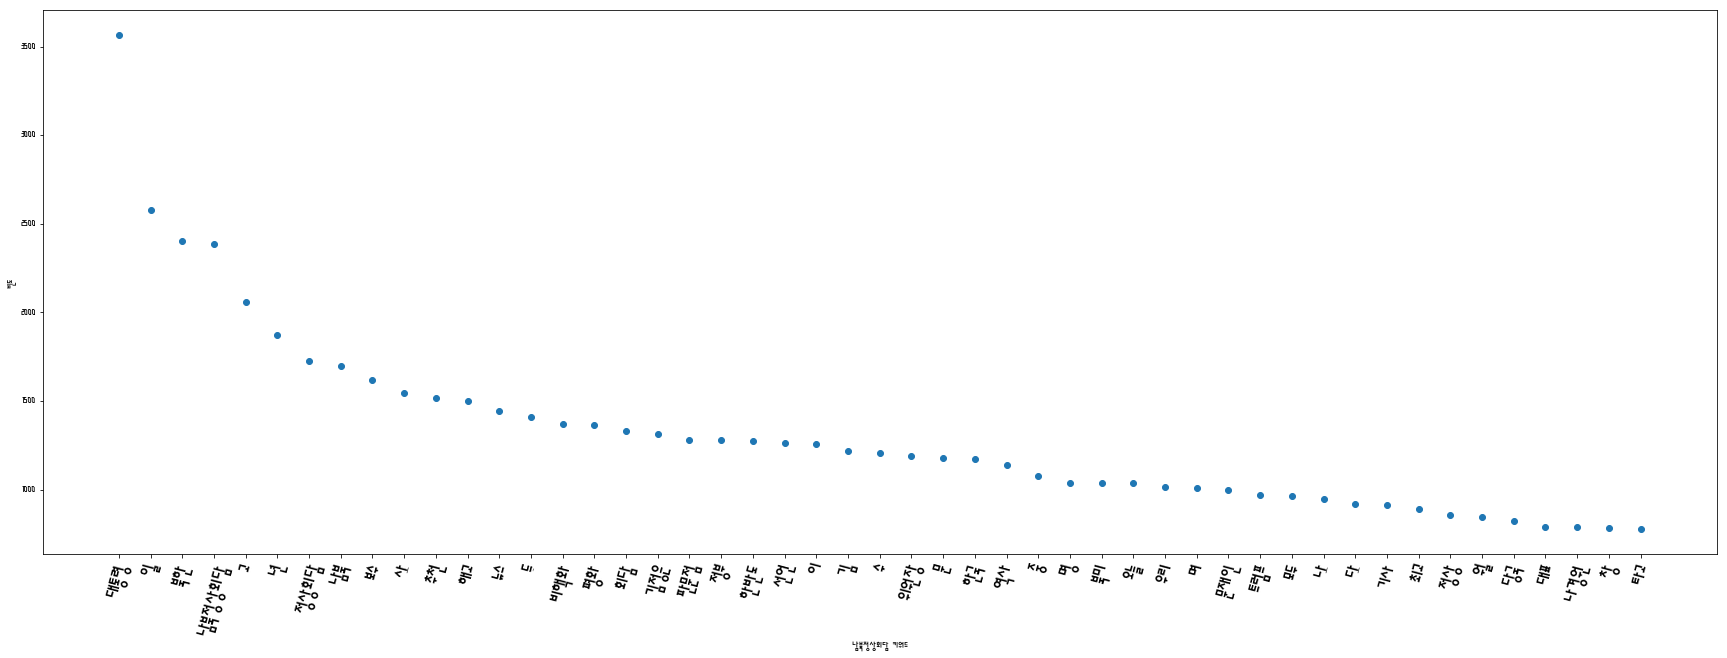

In [68]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(Nam.index,reverse=True)     
plt.scatter(sorted(Nam.index,reverse=False), Nam["남북정상회담"])
plt.xticks(sorted(Nam.index,reverse=False), Nam.index, rotation='75')
plt.xlabel('남북정상회담 키워드') 
plt.ylabel('빈도') 
plt.show()
# 남북정상회담 키워드 빈도 그래프

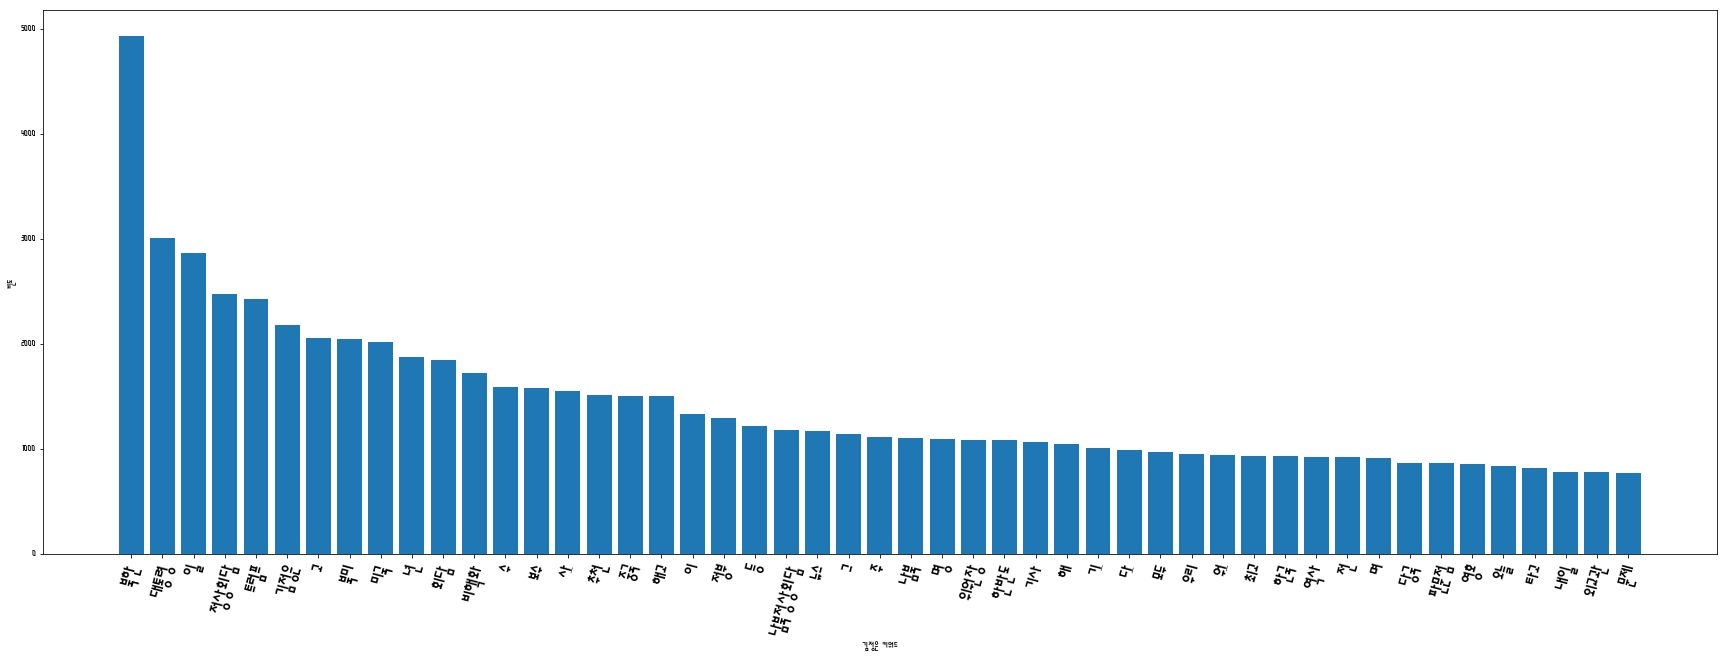

In [69]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(KimJun.index,reverse=True)     
plt.bar(sorted(KimJun.index,reverse=False), KimJun["김정은"])
plt.xticks(sorted(KimJun.index,reverse=False), KimJun.index, rotation='75')
plt.xlabel('김정은 키워드') 
plt.ylabel('빈도') 
plt.show()
# 김정은 키워드 빈도 그래프 

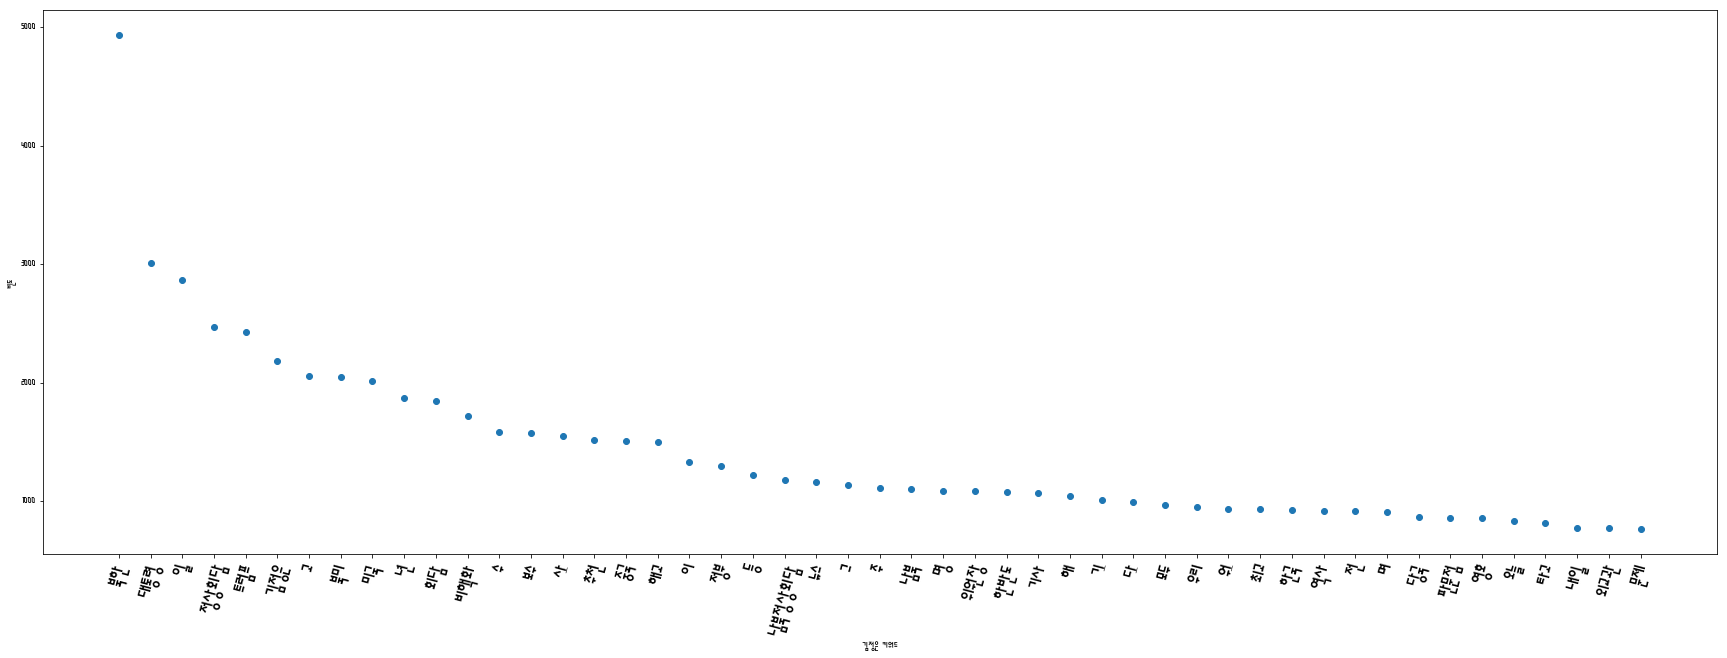

In [70]:
plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
sorted(KimJun.index,reverse=True)     
plt.scatter(sorted(KimJun.index,reverse=False), KimJun["김정은"])
plt.xticks(sorted(KimJun.index,reverse=False), KimJun.index, rotation='75')
plt.xlabel('김정은 키워드') 
plt.ylabel('빈도') 
plt.show()
# 김정은 키워드 빈도 그래프

[]
